In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
a = math.atan2(3**0.5,1)
print(a*180/np.pi)

59.99999999999999


In [3]:
data1 = pd.read_csv('data/NGSIM_Peachtree_Vehicle_Trajectories.csv')
#data2 = pd.read_csv('data/NGSIM__Lankershim_Vehicle_Trajectories.csv')
data3  = pd.read_csv('data/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv')

data = pd.concat([data1,data3],axis=0)
data = pd.concat([data,pd.get_dummies(data['Location'],prefix='Location'),
                  pd.get_dummies(data['v_Class'],prefix='v_Class'),
                  pd.get_dummies(data['Direction'],prefix='Direction'),
                  pd.get_dummies(data['Movement'],prefix='Movement'),
                 ],axis=1)#把location列归一化
data = data.drop(['Location','v_Class','Lane_ID','O_Zone','D_Zone',
                  'Int_ID','Section_ID','Direction','Movement'],
                 axis=1)
for i in range(len(data['Preceding'].values)):
    if data['Preceding'].values[i]>0:
        data['Preceding'].values[i] = 1

for i in range(len(data['Following'].values)):
    if data['Following'].values[i]>0:
        data['Following'].values[i] = 1
        
data['Yaw_Angle'] = 0.
for i in range(len(data['Global_Y'].values)-3):
    yaw_angle = math.atan2(data['Global_Y'].values[i+3] - data['Global_Y'].values[i],
                           data['Global_X'].values[i+3] - data['Global_X'].values[i])*180/np.pi
    data['Yaw_Angle'].values[i] = yaw_angle

def normalize(train):
    train_norm = train.apply(lambda x:(x-np.mean(x)/np.std(x)))
    return train_norm
data = normalize(data)
data.to_csv('处理数据/标准化数据1.csv')
print('end')

KeyboardInterrupt: 

In [3]:
print(np.pi)

3.141592653589793


In [ ]:
#读取csv文件内的数据,并拼接成一个数据
#data1 = pd.read_csv('data/NGSIM_Peachtree_Vehicle_Trajectories.csv')
#data2 = pd.read_csv('data/NGSIM__Lankershim_Vehicle_Trajectories.csv')
data3  = pd.read_csv('data/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv')

data = pd.concat([data3],axis=0)
data = pd.concat([data,pd.get_dummies(data['Location'],prefix='Location'),
                  pd.get_dummies(data['v_Class'],prefix='v_Class'),
                  pd.get_dummies(data['Lane_ID'],prefix='Lane_ID'),
                  pd.get_dummies(data['O_Zone'],prefix='O_Zone'),
                  pd.get_dummies(data['D_Zone'],prefix='D_Zone'),
                  pd.get_dummies(data['Int_ID'],prefix='Int_ID'),
                  pd.get_dummies(data['Direction'],prefix='Direction'),
                  pd.get_dummies(data['Movement'],prefix='Movement'),
                  pd.get_dummies(data['Section_ID'],prefix='Section_ID')
                 ],axis=1)#把location列归一化
data = data.drop(['Location','v_Class','Lane_ID','O_Zone','D_Zone',
                  'Int_ID','Section_ID','Direction','Movement'],
                 axis=1)

for i in range(len(data['Preceding'].values)):
    if data['Preceding'].values[i]>0:
        data['Preceding'].values[i] = 1

for i in range(len(data['Following'].values)):
    if data['Following'].values[i]>0:
        data['Following'].values[i] = 1
        
data['Yaw_Angle'] = 0.
for i in range(len(data['Global_Y'].values)-3):
    yaw_angle = math.atan2(data['Global_X'].values[i+3] - data['Global_X'].values[i],
                           data['Global_Y'].values[i+3] - data['Global_Y'].values[i])
    data['Yaw_Angle'].values[i] = yaw_angle
print('calculate...')
for i in range(len(data['Local_X'].values)):
    data['Local_X'].values[i] =(data['Local_X'].values[i] - np.mean(data['Local_X'].values))/(np.max(data['Local_X'].values)-np.min(data['Local_X'].values))
    
    
for i in range(len(data['Local_Y'].values)):
    data['Local_Y'].values[i] =( data['Local_Y'].values[i] - np.mean(data['Local_Y'].values))/(np.max(data['Local_Y'].values)-np.min(data['Local_Y'].values))
    
#print(data)
data.to_csv('处理数据2.csv')
print('finish')

In [ ]:
data1 = pd.read_csv('data/NGSIM_Peachtree_Vehicle_Trajectories.csv')
#data2 = pd.read_csv('data/NGSIM__Lankershim_Vehicle_Trajectories.csv')
data3  = pd.read_csv('data/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv')

data = pd.concat([data1,data3],axis=0)

data = pd.concat([data,pd.get_dummies(data['Location'],prefix='Location'),
                  pd.get_dummies(data['v_Class'],prefix='v_Class'),
                  pd.get_dummies(data['Direction'],prefix='Direction'),
                  pd.get_dummies(data['Movement'],prefix='Movement'),
                 ],axis=1)#把location列归一化
data = data.drop(['Location','v_Class','Lane_ID','O_Zone','D_Zone',
                  'Int_ID','Section_ID','Direction','Movement'],
                 axis=1)

for i in range(len(data['Preceding'].values)):
    if data['Preceding'].values[i]>0:
        data['Preceding'].values[i] = 1

for i in range(len(data['Following'].values)):
    if data['Following'].values[i]>0:
        data['Following'].values[i] = 1
        
data['Yaw_Angle'] = 0.
for i in range(len(data['Global_Y'].values)-3):
    yaw_angle = math.atan2(data['Global_Y'].values[i+3] - data['Global_Y'].values[i],
                           data['Global_X'].values[i+3] - data['Global_X'].values[i])*180/np.pi
    data['Yaw_Angle'].values[i] = yaw_angle
import numpy as np
def normalize(train):
    train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train_norm
print('begin...')
data=normalize(data)
data.to_csv('处理数据/标准化数据.csv')
print('end')


In [3]:
data1 = pd.read_csv('data/NGSIM_Peachtree_Vehicle_Trajectories.csv')
#data2 = pd.read_csv('data/NGSIM__Lankershim_Vehicle_Trajectories.csv')
data3  = pd.read_csv('data/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv')

data = pd.concat([data1,data3],axis=0)

data = pd.concat([data,pd.get_dummies(data['Location'],prefix='Location')],axis=1)#把location列归一化
data = data.drop(['Location'],axis=1)

for i in range(len(data['Preceding'].values)):
    if data['Preceding'].values[i]>0:
        data['Preceding'].values[i] = 1

for i in range(len(data['Following'].values)):
    if data['Following'].values[i]>0:
        data['Following'].values[i] = 1
        
data['Yaw_Angle'] = 0.
for i in range(len(data['Global_Y'].values)-3):
    yaw_angle = math.atan2(data['Global_X'].values[i+3] - data['Global_X'].values[i],
                           data['Global_Y'].values[i+3] - data['Global_Y'].values[i])
    data['Yaw_Angle'].values[i] = yaw_angle
import numpy as np
def normalize(train):
    train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train_norm
print('begin...')
data=normalize(data)
data.to_csv('处理数据/标准化数据_nodummy.csv')
print('end')


begin...
end


In [6]:
#data1 = pd.read_csv('data/NGSIM_Peachtree_Vehicle_Trajectories.csv')
#data2 = pd.read_csv('data/NGSIM__Lankershim_Vehicle_Trajectories.csv')
data3  = pd.read_csv('data/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv')

data = pd.concat([data3],axis=0)
data = pd.concat([data,pd.get_dummies(data['Location'],prefix='Location'),
                  pd.get_dummies(data['v_Class'],prefix='v_Class'),
                  pd.get_dummies(data['Direction'],prefix='Direction'),
                  pd.get_dummies(data['Movement'],prefix='Movement'),
                 ],axis=1)#把location列归一化
data = data.drop(['Location','v_Class','Lane_ID','O_Zone','D_Zone',
                  'Int_ID','Section_ID','Direction','Movement'],
                 axis=1)
for i in range(len(data['Preceding'].values)):
    if data['Preceding'].values[i]>0:
        data['Preceding'].values[i] = 1

for i in range(len(data['Following'].values)):
    if data['Following'].values[i]>0:
        data['Following'].values[i] = 1
        
data['Yaw_Angle'] = 0.
for i in range(len(data['Global_Y'].values)-3):
    yaw_angle = math.atan2(data['Global_X'].values[i+3] - data['Global_X'].values[i],
                           data['Global_Y'].values[i+3] - data['Global_Y'].values[i])
    data['Yaw_Angle'].values[i] = yaw_angle
import numpy as np
quant_features = ['Local_X','Local_Y','Global_X','Global_Y','v_length','v_Width','v_Vel','v_Acc','Yaw_Angle']
#得到车辆数
vehicle_id = np.array(data['Vehicle_ID'])
print('总采样数为:',len(vehicle_id))
print('总车辆数为:',len(np.unique(vehicle_id)))






总采样数为: 802719
总车辆数为: 1244


In [4]:
data1 = pd.read_csv('data/NGSIM_Peachtree_Vehicle_Trajectories.csv')
#data2 = pd.read_csv('data/NGSIM__Lankershim_Vehicle_Trajectories.csv')
data3  = pd.read_csv('data/Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv')

data_ = pd.concat([data1,data3],axis=0)
quant_features = ['Local_X','Local_Y','Global_X','Global_Y']
scaled_features = {}
print('start..')
for each in quant_features:
    mean, std = data_[each].mean(), data_[each].max()-data_[each].min()
    scaled_features[each] = [mean, std]
    data_.loc[:, each] = (data_[each] - mean)/std
mean_x, std_x = scaled_features['Local_X']
mean_y, std_y = scaled_features['Local_Y']
print(mean_x, std_x)
print(mean_y, std_y)

start..
0.2436986727949202 486.509
927.7015568869493 2113.03


In [ ]:
x,y = next(iter(train_loader))
y = y.cpu().detach().numpy().tolist() 
x = x.cpu().detach().numpy().tolist() 
plt.scatter([s[0] for s in y[0:30]],[s[1] for s in y[0:30]],color= 'red',label = 'globl_position')
plt.scatter([s[0] for s in x[0:30]],[s[1] for s in x[0:30]],color= 'b',label = 'globl_position')

Global location trajectory

In [1]:
i = 0
vehicle_locations = []
for id in np.unique(vehicle_id):
    i = i +1
    vehicle_location = position_global[np.argwhere(vehicle_id==id)]
    vehicle_locations.append(len(vehicle_location))
    plt.scatter([s[0][0] for s in vehicle_location[0:30]],[s[0][1] for s in vehicle_location[0:30]],color= 'red',label = 'globl_position')
    #print([s[0][0] for s in vehicle_location[0:30]],[s[0][1] for s in vehicle_location[0:30]])
    #plt.plot([s[0] for s in position_local[0:30]],[s[1]for s in position_local[0:30]],color = 'blue',label = 'local_position')
    plt.legend()
    plt.show()
    if i == 10:
        break

#plt.savefig('local_postion.png')

NameError: name 'np' is not defined

Local location trjectory 

In [ ]:
i = 0
vehicle_locations = []
for id in np.unique(vehicle_id):
    i = i +1
    vehicle_location = position_local[np.argwhere(vehicle_id==id)]
    vehicle_locations.append(len(vehicle_location))
    plt.scatter([s[0][0] for s in vehicle_location[0:30]],[s[0][1] for s in vehicle_location[0:30]],color= 'red',label = 'local_position')
    #print([s[0][0] for s in vehicle_location[0:30]],[s[0][1] for s in vehicle_location[0:30]])
    #plt.plot([s[0] for s in position_local[0:30]],[s[1]for s in position_local[0:30]],color = 'blue',label = 'local_position')
    plt.legend()
    plt.show()
    if i == 10:
        break

#plt.savefig('local_postion.png')

In [ ]:
print(min(vehicle_locations),max(vehicle_locations))
print(vehicle_locations)

In [ ]:
s = np.array([[1,2],[3,4]])- np.array([[1,3],[4,5]])
print(s)

In [ ]:
def predict(net,test_loader):
    valid_loss = []
    for i,(x,y) in enumerate(train_loader):
        if i == 10:
            break
        if use_cuda:
            x,y = x.cuda(),y.cuda()
        out = net(x)

        loss = criterion(out,y)
        valid_loss.append(loss.item())
        y = y.cpu().detach().numpy().tolist()
        out = out.cpu().detach().numpy().tolist()
        print('Test Loss:',np.mean(valid_loss))
        plt.scatter([s[0]*std_x+mean_x for s in y[:30]],[s[1]*std_y+mean_y for s in y[:30]],color = 'r',label ='actual_path')
        plt.scatter([s[0]*std_x+mean_x for s in out[:30]],[s[1]*std_y+mean_y for s in out[:30]] ,color = 'b',label = 'predict_path')
        plt.legend()
        plt.show()
        
        

它使用最小二乘法将数据的小窗口回归到多项式上，然后使用多项式估计窗口中心的点。最后，窗口向前移动一个数据点并重复该过程。这一直持续到每个点相对于其邻居进行了最佳调整。即使是来自非周期性和非线性源的噪声样本，它也能很好地工作。

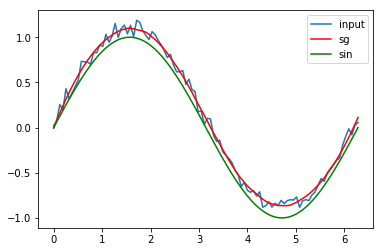

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 39, 2) # window size 51, polynomial order 3
sin = np.sin(x)

plt.plot(x,y,label='input')
plt.plot(x,yhat, color='red',label='sg')
plt.plot(x,sin,color='g',label='sin')
plt.legend()
plt.show()

input data: [ 0.1059127   0.14746339  0.2982714   0.34924263  0.42464794  0.41818672
  0.42647497  0.60334618  0.55694673  0.64084406  0.63462205  0.65690614
  0.7159361   0.81178637  0.88240255  0.96117314  1.00894827  0.92306453
  1.08320619  1.04580813  1.14974978  1.08934056  0.9895987   1.04466496
  1.04495672  1.06959856  1.0040481   1.12694919  1.02043922  1.15761829
  1.07129581  0.95309272  0.90551542  0.91923702  1.00717513  0.98831127
  0.84503035  0.90962337  0.79292948  0.67727689  0.67125486  0.55829407
  0.47904849  0.51872468  0.49809706  0.30646688  0.29513102  0.32246414
  0.15068446  0.15052644  0.12789041 -0.08101627 -0.13739837 -0.05147585
 -0.15280954 -0.26592437 -0.27700796 -0.29715895 -0.31667889 -0.53536237
 -0.51572471 -0.50227556 -0.67249561 -0.74240749 -0.69094854 -0.68644872
 -0.86387669 -0.79806361 -0.90387618 -0.85305891 -0.8817107  -0.92659556
 -0.87658464 -0.94224479 -0.95480118 -0.91099522 -0.96760426 -0.88116426
 -0.95837613 -0.81452224 -0.8740402  -0

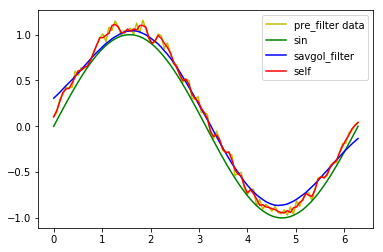

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

Size = 100
x = np.linspace(0,2*np.pi,100)
data = np.sin(x) + np.random.random(100) * 0.2
sin = np.sin(x)
#x = np.linspace(1, Size,Size)
#data = np.random.randint(1, Size, Size)

plt.plot(x, data,color='y',label='pre_filter data')
plt.plot(x,sin,color='g',label='sin')
print("input data:",data)
#savgol_filter
y = savgol_filter(data, 59, 3, mode= 'nearest')
# print(x)
plt.plot(x, y, 'b', label = 'savgol_filter')

#self 
arr = []
window_size = 5
k =3
m = int((window_size-1)/2)
for i in range(window_size):
    a = []
    for j in range(k):
        y_val = np.power(-m + i, j)
        a.append(y_val)
    arr.append(a)

X = np.mat(arr)
print("变量矩阵x:",X.shape)
#print(arr.I)
B = X * (X.T * X).I * X.T
print("矩阵 B:",B.shape)
# print(step)
a = np.array(B[m])#只使用矩阵的第m行
#print(a)
a = a.reshape(window_size)
#print(a)


data = np.insert(data, 0, [data[0] for i in range(m)])
data = np.append(data, [data[-1] for i in range(m)])
#print(data)
list = []
for i in range(m, data.shape[0] - m):
    arra = []
    for j in range(-m, m+1):
        arra.append(data[i +j])#找到临近的window_size个点
    #print(arra)
    b = np.sum(np.array(arra) * a)#使用多项式求解,并把多项式结果作为平滑后的点
    # c = arr * (np.mat(arra).reshape(window_size,1))
    # for j in range(window_size):
    #     data[i - step + j] = c[j][0]
    # print(c.reshape(window_size))
    list.append(b)#得到所有平滑后的点
print("sg_data:",(list))
plt.plot(x, np.array(list), 'r', label = 'self')
plt.legend()
plt.savefig("sg.png",dpi=600)
plt.show()


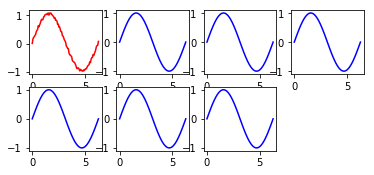

In [19]:
plt.subplot(3,4,1)
x = np.linspace(0,2*np.pi,100)
data = np.sin(x) + np.random.random(100) * 0.1
sin = np.sin(x)
plt.plot(x,data,'r')

plt.subplot(3,4,2)
plt.plot(x,sin,'b')

plt.subplot(3,4,3)
plt.plot(x,sin,'b')

plt.subplot(3,4,4)
plt.plot(x,sin,'b')

plt.subplot(3,4,5)
plt.plot(x,sin,'b')

plt.subplot(3,4,6)
plt.plot(x,sin,'b')

plt.subplot(3,4,7)
plt.plot(x,sin,'b')
plt.show()

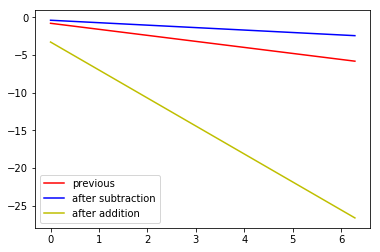

In [31]:
x = np.linspace(0,2*np.pi,100)
y =-(2*ｘ + 2)/2.5
y1 =-((2-0.3*2)*x+(2-0.3))/(2.5-0.3*(-6))
y2 =-((2+0.3*2)*x+(2+0.3))/(2.5+0.3*(-6))
plt.plot(x,y,'r',label='previous')
plt.plot(x,y1,'b',label = 'after subtraction')
plt.plot(x,y2,'y',label = 'after addition')
plt.legend()

In [110]:
x = [2,3,4]
a = [3]
b = [8]
s = a+x+b
x,a,b = np.array(x),np.array(a),np.array(b)
d = a+x+b
print(s)
print(d)

[3, 2, 3, 4, 8]
[13 14 15]


In [123]:
y = [[[1,2,3,4],[6,7,8,9]],[[2,3,4,6],[6,7,9,1]]]
print(np.array(y).shape)
A = [i for i in zip(*(y))]
print(A)

(2, 2, 4)
[([1, 2, 3, 4], [2, 3, 4, 6]), ([6, 7, 8, 9], [6, 7, 9, 1])]


In [9]:
b = np.array([[3,4,5],[3,2,4],[5,6,7],[6,7,8],[7,8,9],[7,6,7],[7,6,7]])
X = b[:-2,:]
Y = b[2:,:2]
print("x",X)
print("y",Y)
print(b[:,:3])

x [[3 4 5]
 [3 2 4]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
y [[5 6]
 [6 7]
 [7 8]
 [7 6]
 [7 6]]
[[3 4 5]
 [3 2 4]
 [5 6 7]
 [6 7 8]
 [7 8 9]
 [7 6 7]
 [7 6 7]]
